
### <p style="text-align:center;">A2 Build KNN Model</p>

##### 1. Load Data

In [177]:
# Ignore warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

# Import libraries
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn import metrics

# Command to display plots inline in Jupyter notebooks
%matplotlib inline

#loading a csv file 
import pandas as pd
loan = pd.read_csv("loan4a2.csv")

# Extract features (X) and target variable (y) from the dataset
X = loan.iloc[:, :-1]  # Extracts all rows and all columns except the last one
y = loan.iloc[:, -1]  # Extracts all rows and the last column

# Print the unique class labels in the target variable y
print('Class labels:', np.unique(y))

Class labels: ['no' 'yes']


##### 2. Split data into train and test
Whenever we are using the random function, it's advised to use a seed to ensure the reproducibility of the results.

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train= np.asarray(X_train)
y_train= np.asarray(y_train)
X_test= np.asarray(X_test)
y_test= np.asarray(y_test)
#Print the size of training and test datasets
print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 21 samples 
test set size: 9 samples


##### 3. Normalize data
Before building the model, it's essential to normalize the data since the unit of measurement might differ across features. This process ensures that all features contribute equally to the model. Here are the two steps involved:

- Step1: Visualize the distribution of each numerical column using a histogram to assess its normality. Look for a bell curve shape, which indicates a Gaussian distribution.

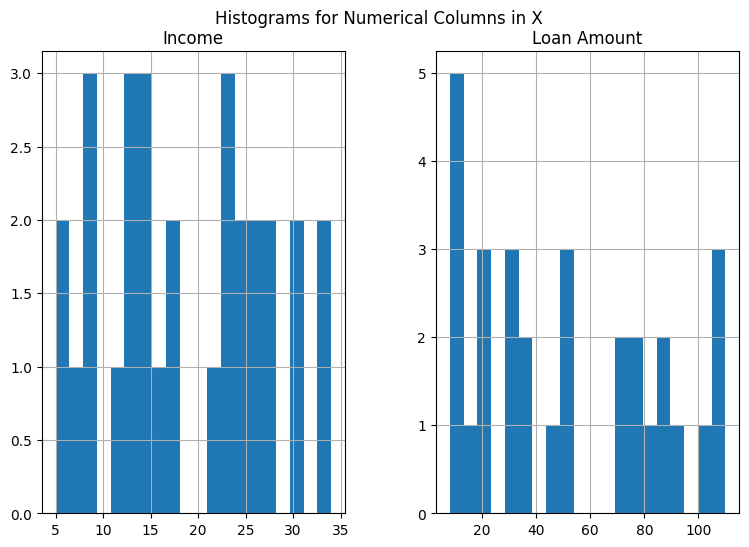

In [179]:
#Visualize the distribution of each numerical column in X
numeric_columns = X.select_dtypes(include=['float64', 'int64'])

numeric_columns.hist(bins=20, figsize=(9, 6))
plt.suptitle('Histograms for Numerical Columns in X', y=0.95)
plt.show()

- Step2 Normalize the features based on the observed distribution. Since columns "Income" and "Loan Amount" exhibit non-Gaussian distributions, Min-Max Normalization will be applied to these columns (Normalizer is not fit here as it is used for row-wise normalization).

In [180]:
#Normalize the dataset
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler().fit(X_train) # the scaler is fitted to the training set
normalized_X_train= scaler.transform(X_train) # the scaler is applied to the training set
normalized_X_test= scaler.transform(X_test) # the scaler is applied to the test set
print('X train before Normalization')
print(X_train[0:5])
print('\nX train after Normalization')
print(normalized_X_train[0:5])

X train before Normalization
[[23 80]
 [18 15]
 [13 51]
 [24 22]
 [ 8 48]]

X train after Normalization
[[0.64285714 0.70588235]
 [0.46428571 0.06862745]
 [0.28571429 0.42156863]
 [0.67857143 0.1372549 ]
 [0.10714286 0.39215686]]


##### 4. Visualize the Dataset before and after Normalization

Text(0.5, 1.08, 'Pair Plot of the dataset Before normalization')

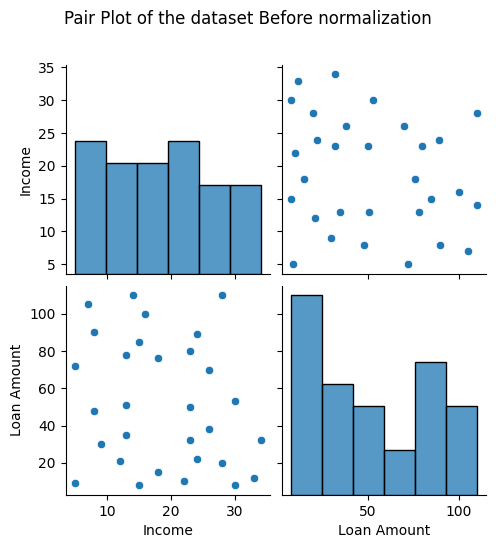

In [181]:
# Before
# View the relationships between variables; color code by species type
before= sns.pairplot(loan)
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

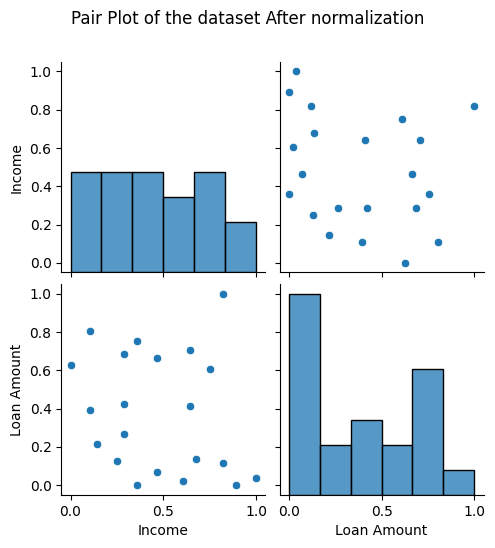

In [182]:
## After
loan_2= pd.DataFrame(data= np.c_[normalized_X_train, y_train],
columns= loan.columns.tolist())
after= sns.pairplot(loan_2)
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

##### Build the KNN classifier and generate the evaluation metrics 

In [183]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')  #using Rule of thumb to choose k = 5
clf.fit(normalized_X_train, y_train)

print("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(normalized_X_train)))
print("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(normalized_X_train)))
print("Train - classification report :", metrics.classification_report(y_train, clf.predict(normalized_X_train)))

print("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(normalized_X_test)))
print("Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(normalized_X_test)))
print("Test - classification report :", metrics.classification_report(y_test, clf.predict(normalized_X_test)))



Train - Accuracy : 1.0
Train - Confusion matrix : [[ 7  0]
 [ 0 14]]
Train - classification report :               precision    recall  f1-score   support

          no       1.00      1.00      1.00         7
         yes       1.00      1.00      1.00        14

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

Test - Accuracy : 1.0
Test - Confusion matrix : [[3 0]
 [0 6]]
Test - classification report :               precision    recall  f1-score   support

          no       1.00      1.00      1.00         3
         yes       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

